In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('ablation_study_out_of_domain.csv')
# df = pd.read_csv('ablation_study_physical_risks.csv')

In [22]:
df.head()


,LLM,Few-shot w/ chain-of-thought,Few-shot w/o chain-of-thought,0-shot w/ chain-of-thought,0-shot w/o chain-of-thought
0,Claude Sonnet,66.8,69.0,56.5,55.8
1,GPT-3.5,19.8,19.8,17.5,3.4
2,Mistral Large,56.0,61.6,52.4,50.9
3,Mixtral 8x22B,54.1,54.3,44.0,49.1
4,Mixtral 8x7B,26.9,34.3,23.5,22.8


In [23]:
df = df.set_index('LLM')

In [24]:
df

,Few-shot w/ chain-of-thought,Few-shot w/o chain-of-thought,0-shot w/ chain-of-thought,0-shot w/o chain-of-thought
LLM,,,,
Claude Sonnet,66.8,69.0,56.5,55.8
GPT-3.5,19.8,19.8,17.5,3.4
Mistral Large,56.0,61.6,52.4,50.9
Mixtral 8x22B,54.1,54.3,44.0,49.1
Mixtral 8x7B,26.9,34.3,23.5,22.8


In [25]:
df

,Few-shot w/ chain-of-thought,Few-shot w/o chain-of-thought,0-shot w/ chain-of-thought,0-shot w/o chain-of-thought
LLM,,,,
Claude Sonnet,66.8,69.0,56.5,55.8
GPT-3.5,19.8,19.8,17.5,3.4
Mistral Large,56.0,61.6,52.4,50.9
Mixtral 8x22B,54.1,54.3,44.0,49.1
Mixtral 8x7B,26.9,34.3,23.5,22.8


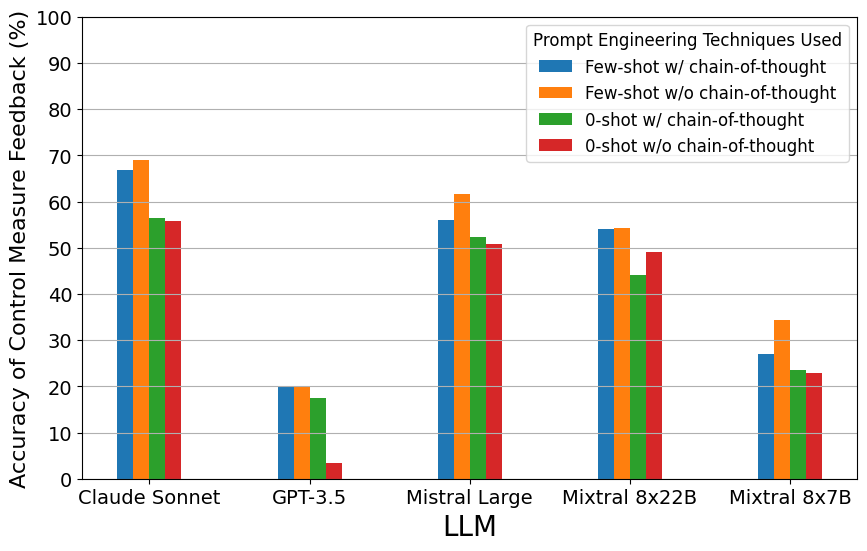

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Number of categories (rows) and series (columns)
categories = df.index
series = df.columns

# Number of categories and series
num_categories = len(categories)
num_series = len(series)

# Position of bars on x-axis
x = np.arange(num_categories)

# Bar width
bar_width = 0.1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot each column (series) as a grouped bar
for i, ser in enumerate(series):
    # Position for each group
    positions = x + i * bar_width
    ax.bar(positions, df[ser], bar_width, label=ser)

# Set the position of the x ticks
ax.set_xticks(x + (num_series / 2 - 0.5) * bar_width)

# Set the labels for the x ticks
ax.set_xticklabels(categories)

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

ax.grid(axis='y')

# Set labels and title
ax.set_xlabel('LLM', fontsize=20)
# ax.set_ylabel('Accuracy of Control Measure Feedback \n for Risk Register Examples (%)')
ax.set_ylabel('Accuracy of Control Measure Feedback (%)', fontsize=16)

# Add legend with title
legend = ax.legend(title='Prompt Engineering Techniques Used', fontsize=12, title_fontsize='12')
# legend.get_title().set_fontsize('13')  # Optionally set the font size of the legend title

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Show the plot
plt.show()